# Tratamientos de los Outliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format #Desactivar notación científica en pandas:
np.set_printoptions(suppress=True) #Desactivar notación científica en numpy:
pd.set_option('display.max_columns', None) #comando para mostrar todas las columnas
pd.set_option('display.max_rows', 500) #comando para mostrar todas las columnas

In [2]:
# Cargamos los datos
os.chdir(r"./data")
data = pd.read_csv("outliers.csv")


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G1      184 non-null    float64
 1   G2      184 non-null    float64
 2   G3      184 non-null    float64
 3   G4      184 non-null    float64
 4   G5      184 non-null    float64
 5   G6      184 non-null    float64
 6   G7      184 non-null    float64
 7   G8      184 non-null    float64
 8   G9      184 non-null    float64
dtypes: float64(9)
memory usage: 13.1 KB


In [4]:
# Igual que en anteriores ocasiones tenemos que comprender nuestros datos.
data.head()

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.17,0.19,-0.16,0.10,0.37,-0.24,-0.80,0.16,-0.21
1,0.10,0.07,0.14,0.18,0.14,-0.06,-0.07,0.07,0.07
2,0.61,0.71,0.88,0.77,0.59,0.19,0.43,0.34,0.19
3,0.77,0.82,0.62,0.37,0.72,0.44,-0.03,-0.26,0.50
4,0.50,0.64,0.84,0.68,0.50,0.15,0.40,0.30,0.26


In [5]:
data.describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9
count,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00,184.00
mean,0.25,0.29,0.35,0.32,0.30,0.14,0.16,0.30,0.13
std,0.72,0.78,0.73,0.74,0.74,0.92,0.82,0.90,0.82
min,-1.17,-1.19,-0.97,-1.19,-1.09,-1.25,-1.47,-1.28,-1.42
25%,-0.05,-0.06,0.05,0.03,-0.07,-0.38,-0.26,-0.14,-0.37
50%,0.18,0.24,0.28,0.29,0.27,0.07,-0.02,0.27,0.01
75%,0.49,0.55,0.59,0.55,0.54,0.48,0.50,0.73,0.50
max,7.20,8.06,7.22,7.59,7.26,8.31,7.83,8.93,7.82


In [6]:
# Comprobamos que no hay valores perdidos.
data.isnull().sum()

G1    0
G2    0
G3    0
G4    0
G5    0
G6    0
G7    0
G8    0
G9    0
dtype: int64

### Detección por boxplot y z-score

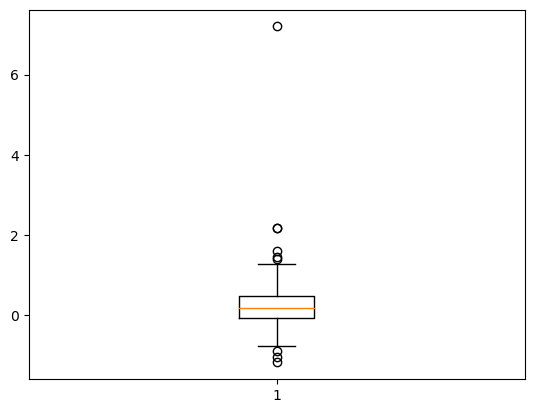

In [7]:
# El primer paso es realizar un "box-plot" para visualizar si existen outliers y como se distribuyen.

# Podemos analizar variable a variableb
data1=data.iloc[:,0]
plt.boxplot(data1);

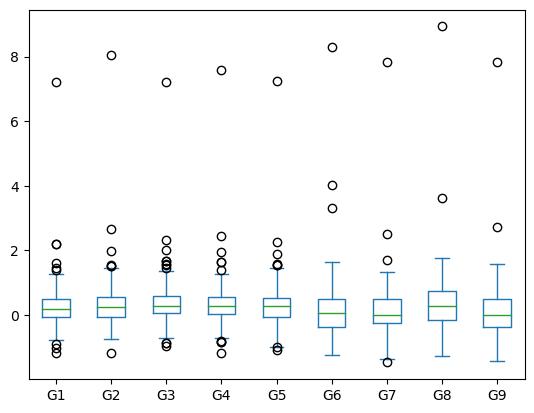

In [8]:
# Tambien podemos realizar un grafico de todas las variables a la vez.
data.plot(kind='box');

In [9]:
# El analisis grafico nos permite ver que existen outliers en todas las variables incluidas en el modelo.
# Una vez que hemos constatado que existen outliers.
# La primera opcion es eliminar las filas que contienen outliers en alguna de las variables.
import numpy as np
from scipy import stats

dataSinOut = data[(np.abs(stats.zscore(data)) <=3).all(axis=1)]  # nos quedamos con los registros cuyos zscore 
                                                                # menor de 3 veces la desviación estandar de la variable



In [10]:
dataOut = data[(np.abs(stats.zscore(data)) >3).all(axis=1)]

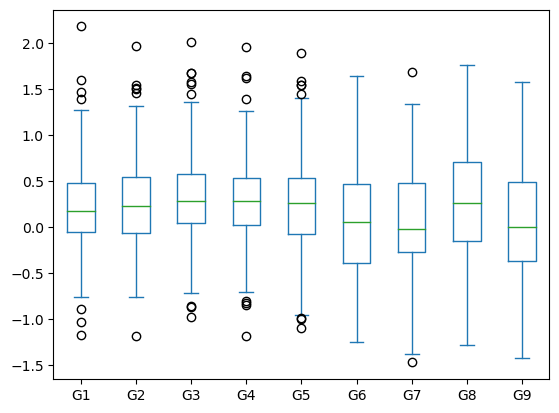

In [11]:
dataSinOut.plot(kind='box');

In [12]:
dataSinOut.shape

(181, 9)

### Marcación de outliers

In [13]:
# Lo primero que tenemos que hacer es calcular los estadisticos basicos para la deteccion de outliers (media o mediana y desviacion tipica)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
G1,184.00,0.25,0.72,-1.17,-0.05,0.18,0.49,7.20
G2,184.00,0.29,0.78,-1.19,-0.06,0.24,0.55,8.06
G3,184.00,0.35,0.73,-0.97,0.05,0.28,0.59,7.22
G4,184.00,0.32,0.74,-1.19,0.03,0.29,0.55,7.59
G5,184.00,0.30,0.74,-1.09,-0.07,0.27,0.54,7.26
G6,184.00,0.14,0.92,-1.25,-0.38,0.07,0.48,8.31
G7,184.00,0.16,0.82,-1.47,-0.26,-0.02,0.50,7.83
G8,184.00,0.30,0.90,-1.28,-0.14,0.27,0.73,8.93
G9,184.00,0.13,0.82,-1.42,-0.37,0.01,0.50,7.82


In [14]:
# En los pasos anteriores hemos descubierto que la fila 38 presenta unos valores muy anomalos.
# Por ello la vamos a eliminar.
# Una forma de eliminarla es hacerlo manualmente.

data1=data.drop(data.index[38])
data1.head(n=40)

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.17,0.19,-0.16,0.10,0.37,-0.24,-0.80,0.16,-0.21
1,0.10,0.07,0.14,0.18,0.14,-0.06,-0.07,0.07,0.07
2,0.61,0.71,0.88,0.77,0.59,0.19,0.43,0.34,0.19
3,0.77,0.82,0.62,0.37,0.72,0.44,-0.03,-0.26,0.50
4,0.50,0.64,0.84,0.68,0.50,0.15,0.40,0.30,0.26
5,0.57,0.73,0.88,0.62,0.59,0.20,0.43,-0.02,0.35
6,0.89,0.93,0.88,0.66,0.84,0.92,0.59,0.25,0.80
7,-0.03,0.07,0.26,0.08,-0.05,-0.46,-0.15,-0.36,-0.38
8,1.40,1.46,1.34,1.12,1.39,1.41,0.92,0.64,1.38
9,0.39,0.43,0.33,0.47,0.35,0.54,-0.16,-0.46,0.26


In [15]:
# Ésto es una opción viable en el caso de que debamos eliminar pocas observaciones.
# Otra opción es seleccionar una de las variables, ver a partir de que valor 
# queremos eliminar la observación y hacerlo a mano.

data2=data[(data["G1"] < 5)]
data2.head(n=40)


,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.17,0.19,-0.16,0.10,0.37,-0.24,-0.80,0.16,-0.21
1,0.10,0.07,0.14,0.18,0.14,-0.06,-0.07,0.07,0.07
2,0.61,0.71,0.88,0.77,0.59,0.19,0.43,0.34,0.19
3,0.77,0.82,0.62,0.37,0.72,0.44,-0.03,-0.26,0.50
4,0.50,0.64,0.84,0.68,0.50,0.15,0.40,0.30,0.26
5,0.57,0.73,0.88,0.62,0.59,0.20,0.43,-0.02,0.35
6,0.89,0.93,0.88,0.66,0.84,0.92,0.59,0.25,0.80
7,-0.03,0.07,0.26,0.08,-0.05,-0.46,-0.15,-0.36,-0.38
8,1.40,1.46,1.34,1.12,1.39,1.41,0.92,0.64,1.38
9,0.39,0.43,0.33,0.47,0.35,0.54,-0.16,-0.46,0.26


In [16]:
data['Outliers_G1'] = False
data['Outliers_G2'] = False
data['Outliers_G3'] = False
data.loc[(data["G1"] >= 5),'Outliers_G1'] = True
data.loc[(data["G2"] >= 5),'Outliers_G2'] = True
data.loc[(data["G3"] >= 5),'Outliers_G3'] = True


In [17]:
data

,G1,G2,G3,G4,G5,G6,G7,G8,G9,Outliers_G1,Outliers_G2,Outliers_G3
0,0.17,0.19,-0.16,0.10,0.37,-0.24,-0.80,0.16,-0.21,False,False,False
1,0.10,0.07,0.14,0.18,0.14,-0.06,-0.07,0.07,0.07,False,False,False
2,0.61,0.71,0.88,0.77,0.59,0.19,0.43,0.34,0.19,False,False,False
3,0.77,0.82,0.62,0.37,0.72,0.44,-0.03,-0.26,0.50,False,False,False
4,0.50,0.64,0.84,0.68,0.50,0.15,0.40,0.30,0.26,False,False,False
5,0.57,0.73,0.88,0.62,0.59,0.20,0.43,-0.02,0.35,False,False,False
6,0.89,0.93,0.88,0.66,0.84,0.92,0.59,0.25,0.80,False,False,False
7,-0.03,0.07,0.26,0.08,-0.05,-0.46,-0.15,-0.36,-0.38,False,False,False
8,1.40,1.46,1.34,1.12,1.39,1.41,0.92,0.64,1.38,False,False,False
9,0.39,0.43,0.33,0.47,0.35,0.54,-0.16,-0.46,0.26,False,False,False


Otra opción es eliminar aquellas observaciones que sobrepasen una desviación prefijada. Ésto se puede aplicar sobre una de las variables o sobre todo el dataset. Aplicarlo sobre una determinada variable nos exige ser cuidadosos a la hora de fijar el límite para no eliminar demasiadas observaciones.



In [18]:
# Para ello utilizamos una formula que ya hemos visto con anterioridad modificada.
# Tras ello comprobamos que no hemos eliminado elementos que queriamos mantener y 
# que hemos eliminado la fila 38.

from scipy import stats
data1=data[(np.abs(stats.zscore(data["G1"])) < 6)]

print(data1)
data1.head(n=40)

       G1    G2    G3    G4    G5    G6    G7    G8    G9  Outliers_G1  \
0    0.17  0.19 -0.16  0.10  0.37 -0.24 -0.80  0.16 -0.21        False   
1    0.10  0.07  0.14  0.18  0.14 -0.06 -0.07  0.07  0.07        False   
2    0.61  0.71  0.88  0.77  0.59  0.19  0.43  0.34  0.19        False   
3    0.77  0.82  0.62  0.37  0.72  0.44 -0.03 -0.26  0.50        False   
4    0.50  0.64  0.84  0.68  0.50  0.15  0.40  0.30  0.26        False   
5    0.57  0.73  0.88  0.62  0.59  0.20  0.43 -0.02  0.35        False   
6    0.89  0.93  0.88  0.66  0.84  0.92  0.59  0.25  0.80        False   
7   -0.03  0.07  0.26  0.08 -0.05 -0.46 -0.15 -0.36 -0.38        False   
8    1.40  1.46  1.34  1.12  1.39  1.41  0.92  0.64  1.38        False   
9    0.39  0.43  0.33  0.47  0.35  0.54 -0.16 -0.46  0.26        False   
10   0.15  0.24  0.42  0.33  0.19 -0.27  0.00 -0.15 -0.10        False   
11   0.13  0.17  0.38  0.34  0.12 -0.30 -0.15 -0.06 -0.10        False   
12   0.17  0.30  0.47  0.25  0.17 -0.2

,G1,G2,G3,G4,G5,G6,G7,G8,G9,Outliers_G1,Outliers_G2,Outliers_G3
0,0.17,0.19,-0.16,0.10,0.37,-0.24,-0.80,0.16,-0.21,False,False,False
1,0.10,0.07,0.14,0.18,0.14,-0.06,-0.07,0.07,0.07,False,False,False
2,0.61,0.71,0.88,0.77,0.59,0.19,0.43,0.34,0.19,False,False,False
3,0.77,0.82,0.62,0.37,0.72,0.44,-0.03,-0.26,0.50,False,False,False
4,0.50,0.64,0.84,0.68,0.50,0.15,0.40,0.30,0.26,False,False,False
5,0.57,0.73,0.88,0.62,0.59,0.20,0.43,-0.02,0.35,False,False,False
6,0.89,0.93,0.88,0.66,0.84,0.92,0.59,0.25,0.80,False,False,False
7,-0.03,0.07,0.26,0.08,-0.05,-0.46,-0.15,-0.36,-0.38,False,False,False
8,1.40,1.46,1.34,1.12,1.39,1.41,0.92,0.64,1.38,False,False,False
9,0.39,0.43,0.33,0.47,0.35,0.54,-0.16,-0.46,0.26,False,False,False


In [19]:
data1.shape

(183, 12)

Otra opción en vez de eliminar la observación es transformarlos NAs

### Rango Intercuartílico y outliers

In [20]:
tmp = data
tmp

,G1,G2,G3,G4,G5,G6,G7,G8,G9,Outliers_G1,Outliers_G2,Outliers_G3
0,0.17,0.19,-0.16,0.10,0.37,-0.24,-0.80,0.16,-0.21,False,False,False
1,0.10,0.07,0.14,0.18,0.14,-0.06,-0.07,0.07,0.07,False,False,False
2,0.61,0.71,0.88,0.77,0.59,0.19,0.43,0.34,0.19,False,False,False
3,0.77,0.82,0.62,0.37,0.72,0.44,-0.03,-0.26,0.50,False,False,False
4,0.50,0.64,0.84,0.68,0.50,0.15,0.40,0.30,0.26,False,False,False
5,0.57,0.73,0.88,0.62,0.59,0.20,0.43,-0.02,0.35,False,False,False
6,0.89,0.93,0.88,0.66,0.84,0.92,0.59,0.25,0.80,False,False,False
7,-0.03,0.07,0.26,0.08,-0.05,-0.46,-0.15,-0.36,-0.38,False,False,False
8,1.40,1.46,1.34,1.12,1.39,1.41,0.92,0.64,1.38,False,False,False
9,0.39,0.43,0.33,0.47,0.35,0.54,-0.16,-0.46,0.26,False,False,False


In [21]:
# Una forma de ver en cada variable en que observacion se encuentran los outliers.
# Se fundamenta en la diferencia para el percentil 25 y 75.

import numpy as np

def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))


datos=data.iloc[:,:-3].apply(outliers_iqr)  # Ojo, no estoy cogiendo las 3columnas en las que guardamos
                                            # los lógicos de outliers. Este valor podría cambiar.
datos

,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,"[8, 38, 39, 59, 65, 102, 110, 112, 152]","[38, 39, 61, 102, 110, 112, 152]","[38, 39, 56, 59, 65, 110, 112, 117, 120, 121, ...","[38, 39, 54, 56, 65, 102, 110, 112, 117, 152]","[38, 39, 59, 64, 110, 120, 121, 152]","[38, 39, 154]","[38, 39, 56, 152]","[38, 39]","[38, 39]"


In [22]:
# Elimino aquellas columnas que empiezan por Outliers
data1= data1.filter(regex='^(?!Outliers)', axis=1)

In [23]:
# Para ello utilizamos una formula ya utilizada pero modificada, igual que antes.
# Realizamos la comprobacion de antes
# Mostramos la fila que nos interesa (un numero menos ya que se ha eliminado la fila 38)

from scipy import stats
import numpy as np
data1=data1[(np.abs(stats.zscore(data1)) <6).all(axis=1)]

print(data1)



       G1    G2    G3    G4    G5    G6    G7    G8    G9
0    0.17  0.19 -0.16  0.10  0.37 -0.24 -0.80  0.16 -0.21
1    0.10  0.07  0.14  0.18  0.14 -0.06 -0.07  0.07  0.07
2    0.61  0.71  0.88  0.77  0.59  0.19  0.43  0.34  0.19
3    0.77  0.82  0.62  0.37  0.72  0.44 -0.03 -0.26  0.50
4    0.50  0.64  0.84  0.68  0.50  0.15  0.40  0.30  0.26
5    0.57  0.73  0.88  0.62  0.59  0.20  0.43 -0.02  0.35
6    0.89  0.93  0.88  0.66  0.84  0.92  0.59  0.25  0.80
7   -0.03  0.07  0.26  0.08 -0.05 -0.46 -0.15 -0.36 -0.38
8    1.40  1.46  1.34  1.12  1.39  1.41  0.92  0.64  1.38
9    0.39  0.43  0.33  0.47  0.35  0.54 -0.16 -0.46  0.26
10   0.15  0.24  0.42  0.33  0.19 -0.27  0.00 -0.15 -0.10
11   0.13  0.17  0.38  0.34  0.12 -0.30 -0.15 -0.06 -0.10
12   0.17  0.30  0.47  0.25  0.17 -0.23 -0.04  0.01 -0.12
13   0.37  0.42  0.30  0.11  0.33  0.09 -0.15 -0.40  0.25
14   0.05  0.16  0.35  0.26  0.05 -0.27 -0.23 -0.21 -0.20
15  -0.15 -0.28 -0.14 -0.09 -0.19 -0.70 -1.03  0.01 -0.40
16   0.25  0.4

In [24]:
print(data1.head(n=40))

      G1    G2    G3    G4    G5    G6    G7    G8    G9
0   0.17  0.19 -0.16  0.10  0.37 -0.24 -0.80  0.16 -0.21
1   0.10  0.07  0.14  0.18  0.14 -0.06 -0.07  0.07  0.07
2   0.61  0.71  0.88  0.77  0.59  0.19  0.43  0.34  0.19
3   0.77  0.82  0.62  0.37  0.72  0.44 -0.03 -0.26  0.50
4   0.50  0.64  0.84  0.68  0.50  0.15  0.40  0.30  0.26
5   0.57  0.73  0.88  0.62  0.59  0.20  0.43 -0.02  0.35
6   0.89  0.93  0.88  0.66  0.84  0.92  0.59  0.25  0.80
7  -0.03  0.07  0.26  0.08 -0.05 -0.46 -0.15 -0.36 -0.38
8   1.40  1.46  1.34  1.12  1.39  1.41  0.92  0.64  1.38
9   0.39  0.43  0.33  0.47  0.35  0.54 -0.16 -0.46  0.26
10  0.15  0.24  0.42  0.33  0.19 -0.27  0.00 -0.15 -0.10
11  0.13  0.17  0.38  0.34  0.12 -0.30 -0.15 -0.06 -0.10
12  0.17  0.30  0.47  0.25  0.17 -0.23 -0.04  0.01 -0.12
13  0.37  0.42  0.30  0.11  0.33  0.09 -0.15 -0.40  0.25
14  0.05  0.16  0.35  0.26  0.05 -0.27 -0.23 -0.21 -0.20
15 -0.15 -0.28 -0.14 -0.09 -0.19 -0.70 -1.03  0.01 -0.40
16  0.25  0.47  0.23  0.33  0.5

In [25]:
print(data1.iloc[151,:])

G1   1.60
G2   1.52
G3   1.57
G4   1.63
G5   1.59
G6   1.57
G7   1.69
G8   1.77
G9   1.38
Name: 152, dtype: float64


### Sustitución de outliers

In [32]:
# Mediante esta formula podemos sustituir los outliers por la media.

def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = mean        
    return group


datos= datos.filter(regex='^(?!Outliers)', axis=1)
datos=datos.apply(replace)

datos.head(n=40)



,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.17,0.19,-0.16,0.10,0.37,-0.24,-0.80,0.16,-0.21
1,0.10,0.07,0.14,0.18,0.14,-0.06,-0.07,0.07,0.07
2,0.61,0.71,0.88,0.77,0.59,0.19,0.43,0.34,0.19
3,0.77,0.82,0.62,0.37,0.72,0.44,-0.03,-0.26,0.50
4,0.50,0.64,0.84,0.68,0.50,0.15,0.40,0.30,0.26
5,0.57,0.73,0.88,0.62,0.59,0.20,0.43,-0.02,0.35
6,0.89,0.93,0.88,0.66,0.84,0.92,0.59,0.25,0.80
7,-0.03,0.07,0.26,0.08,-0.05,-0.46,-0.15,-0.36,-0.38
8,1.40,1.46,1.34,1.12,1.39,1.41,0.92,0.64,1.38
9,0.39,0.43,0.33,0.47,0.35,0.54,-0.16,-0.46,0.26


In [33]:
# De esta manera podemos convertir los outliers en NAs y luego tratarlos como NAs.
# El trataiento de NAs lo hemos visto previamente.

import numpy as np

def replace2(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 3*std
    group[outliers] = np.nan        
    return group


datos=datos.apply(replace2)

datos.head(n=10)


,G1,G2,G3,G4,G5,G6,G7,G8,G9
0,0.17,0.19,-0.16,0.10,0.37,-0.24,-0.80,0.16,-0.21
1,0.10,0.07,0.14,0.18,0.14,-0.06,-0.07,0.07,0.07
2,0.61,0.71,0.88,0.77,0.59,0.19,0.43,0.34,0.19
3,0.77,0.82,0.62,0.37,0.72,0.44,-0.03,-0.26,0.50
4,0.50,0.64,0.84,0.68,0.50,0.15,0.40,0.30,0.26
5,0.57,0.73,0.88,0.62,0.59,0.20,0.43,-0.02,0.35
6,0.89,0.93,0.88,0.66,0.84,0.92,0.59,0.25,0.80
7,-0.03,0.07,0.26,0.08,-0.05,-0.46,-0.15,-0.36,-0.38
8,1.40,1.46,1.34,1.12,1.39,1.41,0.92,0.64,1.38
9,0.39,0.43,0.33,0.47,0.35,0.54,-0.16,-0.46,0.26
